# Missing Data Imputation 


1.   Complete Case Analysis
2.   Mean or Median Imputation
3.   Arbitrary Value Imputation
4.   End of Distribution
5.   Frequent Category Imputation
6.   Missing Category Imputation
7.   Random Sample Imputation
8.   Adding a Missing Category
9.   Multivariate Imputation
10.  KNN Imputation
11.  MICE
12.  Miss Forest





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)


# 1.Complete Case Analysis


In [4]:
dataset=pd.read_csv("/content/kaggle_house_pred_train.csv")

In [34]:
missing_list = [feat for feat in dataset.columns if dataset[feat].isnull().mean()>0]

In [ ]:
missing_list

# List the mean of each Variable

In [24]:
cols=dataset[missing_list].isnull().mean()

In [11]:
type(cols)

pandas.core.series.Series

In [25]:
cols=pd.DataFrame(cols.reset_index())
cols.columns=["Feature","Mean"]

In [36]:
vars_cca = [var for var in missing_list if dataset[var].isnull().mean() < 0.05]

In [37]:
vars_cca

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical']

In [20]:
len(dataset.dropna(subset=vars_cca)) / len(dataset)


0.9671232876712329

In [21]:
data_cca=dataset.dropna(subset=vars_cca)

In [22]:
dataset.shape,data_cca.shape

((1460, 81), (1412, 81))

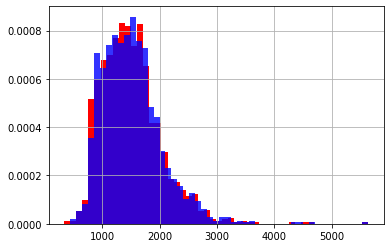

In [30]:
## Let's check the distribution of a few variables before and after 
# cca: histogram.
# Data after cca: the argument "alpha" makes 
# the color  of the plot transparent, so we can
# see the overlay between the 2 distributions.

fig = plt.figure()
ax = fig.add_subplot(111)
dataset['GrLivArea'].hist(bins=50, ax=ax, density=True, color='red')
data_cca['GrLivArea'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

In [38]:
def categorical_distribution(df, df_cca, variable):
    tmp = pd.concat(
        [
            # percentage of observations per category, original data
            df[variable].value_counts() / len(df),

            # percentage of observations per category, cca data
            df_cca[variable].value_counts() / len(df_cca)
        ],
        axis=1)

    # add column names
    tmp.columns = ['original', 'cca']

    return tmp

In [39]:
categorical_distribution(dataset, data_cca, 'BsmtQual')

,original,cca
TA,0.444521,0.458924
Gd,0.423288,0.431303
Ex,0.082877,0.084986
Fa,0.023973,0.024788
